# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Add your API key to the base URL
url = f"{base_url}?appid={weather_api_key}&q="
response = requests.get(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    city_response = requests.get(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather_json = city_response.json()
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | mandal
Processing Record 10 of Set 1 | libreville
Processing Record 11 of Set 1 | crane
Processing Record 12 of Set 1 | paradip garh
Processing Record 13 of Set 1 | xuddur
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | along
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | papao
Processing Record 18 of Set 1 | port-saint-louis-du-rhone
Processing Record 19 of Set 1 | puerto baquerizo moreno
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | turpan
Processing Record 22 of Set 1 | chongwe
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,277.77,87,46,2.98,CL,1683424529
1,blackmans bay,-43.0167,147.3167,283.56,64,89,4.13,AU,1683424529
2,hadibu,12.6500,54.0333,301.14,78,45,2.23,YE,1683424530
3,georgetown,5.4112,100.3354,302.11,89,20,1.54,MY,1683424514
4,aasiaat,68.7098,-52.8699,270.51,97,100,1.38,GL,1683424531


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,277.77,87,46,2.98,CL,1683424529
1,blackmans bay,-43.0167,147.3167,283.56,64,89,4.13,AU,1683424529
2,hadibu,12.6500,54.0333,301.14,78,45,2.23,YE,1683424530
3,georgetown,5.4112,100.3354,302.11,89,20,1.54,MY,1683424514
4,aasiaat,68.7098,-52.8699,270.51,97,100,1.38,GL,1683424531


In [8]:
# Convert Kelvin to Celsius for Max Temp column
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.62,87,46,2.98,CL,1683424529
1,blackmans bay,-43.0167,147.3167,10.41,64,89,4.13,AU,1683424529
2,hadibu,12.6500,54.0333,27.99,78,45,2.23,YE,1683424530
3,georgetown,5.4112,100.3354,28.96,89,20,1.54,MY,1683424514
4,aasiaat,68.7098,-52.8699,-2.64,97,100,1.38,GL,1683424531


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

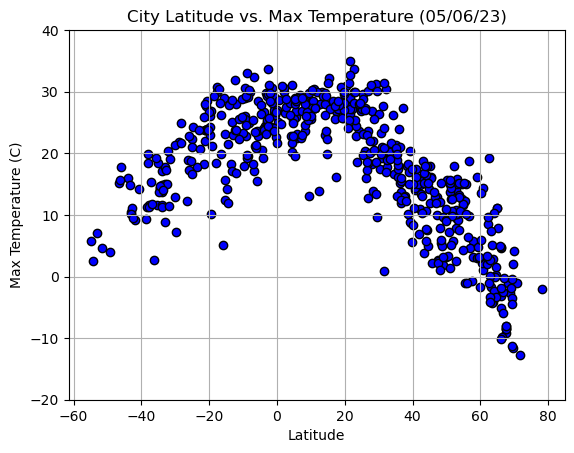

In [9]:
# Create a scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="blue", edgecolor="black")

# Set the chart title and labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Set the y axis range
plt.ylim(-20, 40)

# Add a grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

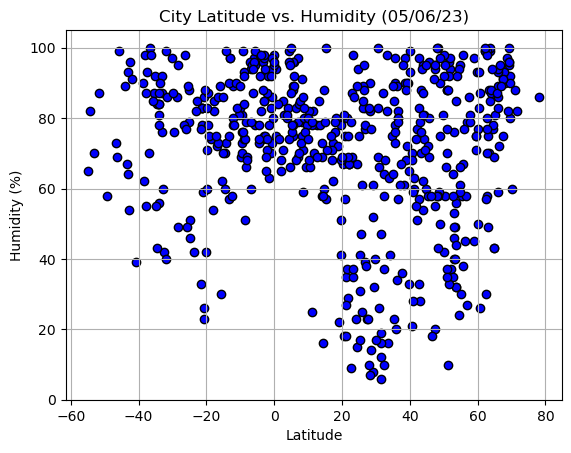

In [10]:
# Create a scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="blue", edgecolor="black")

# Set the chart title and labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the y axis range
plt.ylim(0, 105)

# Add a grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

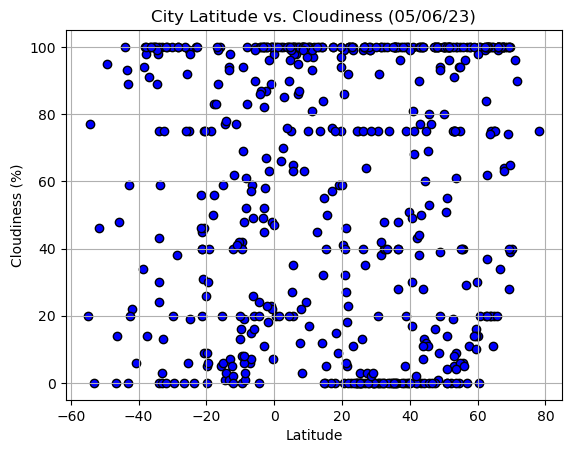

In [11]:
# Create scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="blue", edgecolor="black")

# Set the chart title and labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add a grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

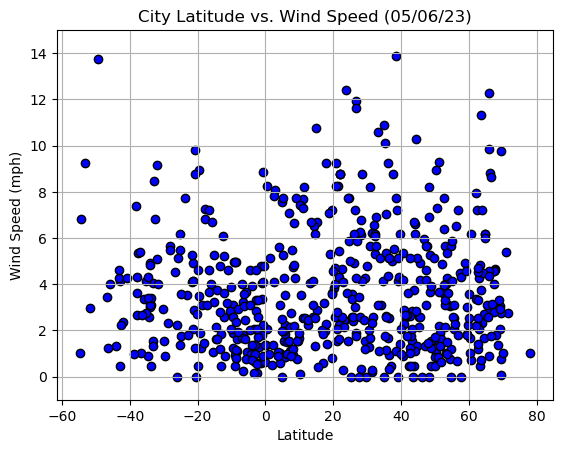

In [12]:
# Create a scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="blue", edgecolor="black")

# Set the chart title and labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the y axis range
plt.ylim(-1, 15)

# Add a grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def plot_linear_regression(x_data, y_data, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot scatter plot and regression line
    plt.scatter(x_data, y_data)
    plt.plot(x_data, regress_values, "r-")

    # Annotate plot with equation and r-value
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")


    # Set chart title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2:.2f}")

    # Show plot
    plt.show()



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hadibu,12.6500,54.0333,27.99,78,45,2.23,YE,1683424530
3,georgetown,5.4112,100.3354,28.96,89,20,1.54,MY,1683424514
4,aasiaat,68.7098,-52.8699,-2.64,97,100,1.38,GL,1683424531
6,ilulissat,69.2167,-51.1000,-0.99,100,100,2.06,GL,1683424532
8,mandal,25.4500,74.5667,29.61,31,3,3.58,IN,1683424533


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.62,87,46,2.98,CL,1683424529
1,blackmans bay,-43.0167,147.3167,10.41,64,89,4.13,AU,1683424529
5,waitangi,-43.9535,-176.5597,16.01,89,100,1.34,NZ,1683424531
7,adamstown,-25.0660,-130.1015,22.27,79,99,5.46,PN,1683424532
15,grytviken,-54.2811,-36.5092,2.52,82,77,6.83,GS,1683424536


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.74


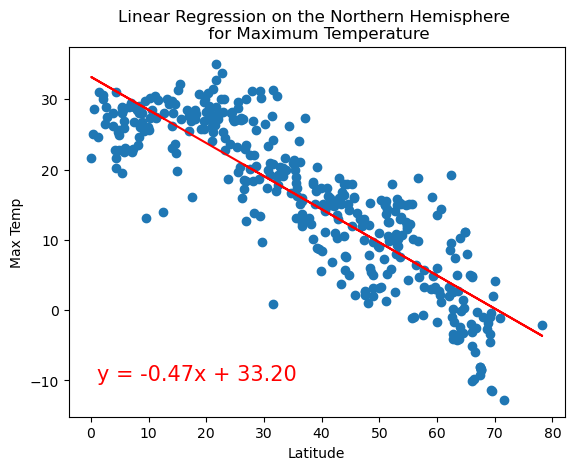

In [16]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
y_label = 'Max Temp'
text_coordinates = (1,-10)

plot_linear_regression(x_values, y_values, "Latitude", y_label, title, text_coordinates)


The r-squared is: 0.54


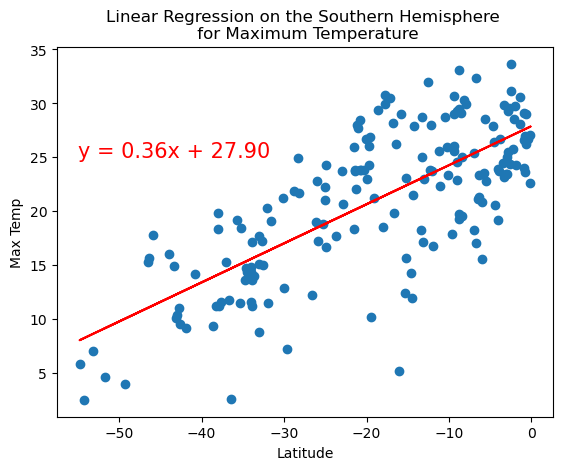

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
y_label = 'Max Temp'
text_coordinates = (-55, 25)

plot_linear_regression(x_values, y_values, "Latitude", y_label, title, text_coordinates)


**Discussion about the linear relationship:** 
The r-squared values indicate that there is a moderate positive correlation between latitude and maximum temperature for cities in the Southern Hemisphere, and a moderately strong negative correlation between latitude and maximum temperature for cities in the Northern Hemisphere.

The regression lines show that in the Southern Hemisphere, as the latitude of a city increases (moving closer to the equator), the maximum temperature tends to increase as well. However, in the Northern Hemisphere, as the latitude of a city increases (moving farther from the equator), the maximum temperature tends to decrease.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00


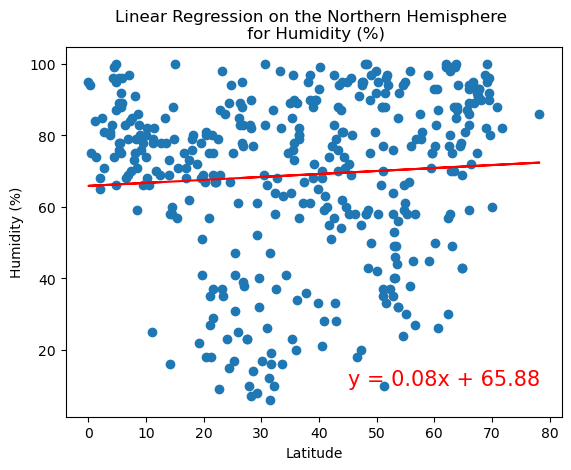

In [18]:
# Northern Hemisphere
# Set x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Set plot title and labels
title = 'Linear Regression on the Northern Hemisphere \n for Humidity (%)'
x_label = 'Latitude'
y_label = 'Humidity (%)'

# Set text coordinates for annotation
text_coordinates = (45, 10)

# Create plot with linear regression
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

The r-squared is: 0.02


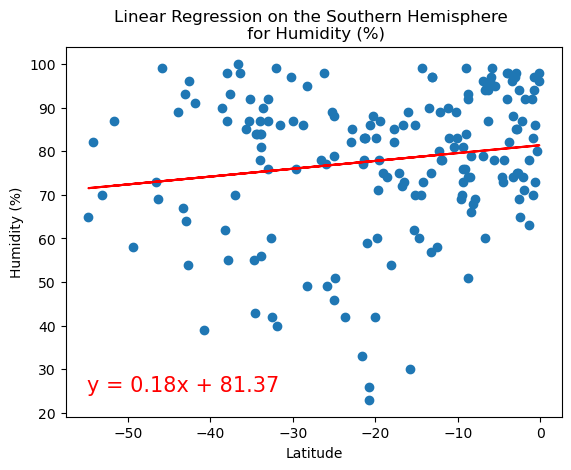

In [19]:
# Southern Hemisphere
# Set x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Set plot title and labels
title = 'Linear Regression on the Southern Hemisphere \n for Humidity (%)'
x_label = 'Latitude'
y_label = 'Humidity (%)'

# Set text coordinates for annotation
text_coordinates = (-55, 25)

# Create plot with linear regression
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** For both hemispheres, the linear regression line suggests a very weak or no correlation between humidity and latitude. The r-squared values are close to zero, which means that only a very small portion of the variance in humidity can be explained by latitude. In the Northern Hemisphere, the slope of the regression line is positive, which suggests that there might be a slight increase in humidity as we move towards the equator, but again, this relationship is very weak. In the Southern Hemisphere, the slope of the regression line is also positive, indicating a similar trend. However, this trend is even weaker in the Southern Hemisphere than in the Northern Hemisphere. Overall, we can conclude that there is no meaningful relationship between humidity and latitude based on these plots

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00


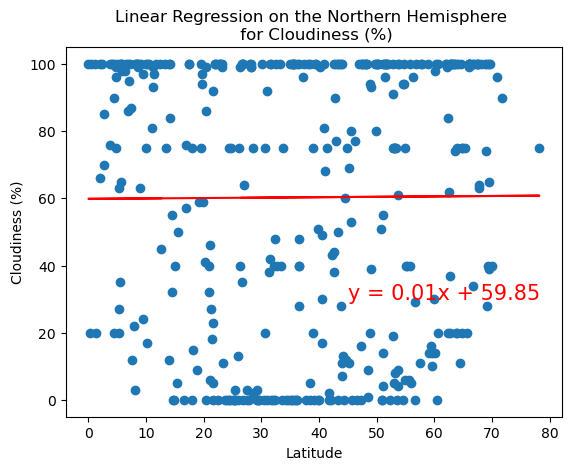

In [20]:
# Northern Hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = 'Linear Regression on the Northern Hemisphere \n for Cloudiness (%)'
y_label = 'Cloudiness (%)'
text_coordinates = (45, 30)

plot_linear_regression(x_values, y_values, "Latitude", y_label, title, text_coordinates)

The r-squared is: 0.00


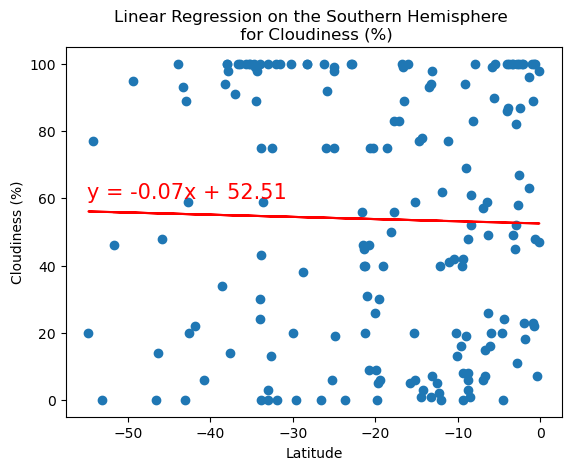

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
title = 'Linear Regression on the Southern Hemisphere \n for Cloudiness (%)'
y_label = 'Cloudiness (%)'
text_coordinates = (-55, 60)

plot_linear_regression(x_values, y_values, "Latitude", y_label, title, text_coordinates)

**Discussion about the linear relationship:** The r-squared values for the Northern and Southern Hemisphere are 0.00 and 0.01 respectively, indicating a weak correlation between cloudiness and latitude in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00


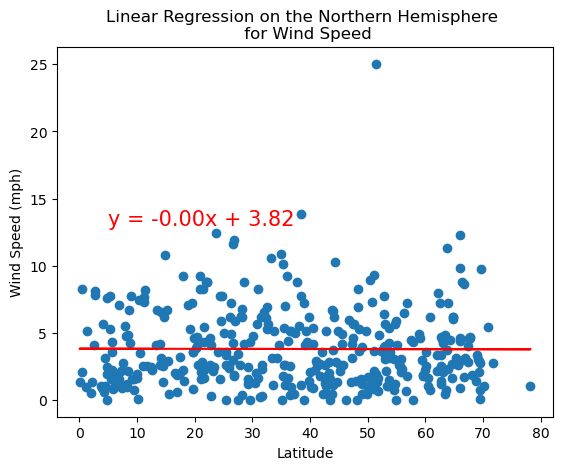

In [22]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = 'Linear Regression on the Northern Hemisphere \n for Wind Speed'
y_label = 'Wind Speed (mph)'
text_coordinates = (5, 13)

plot_linear_regression(x_values, y_values, "Latitude", y_label, title, text_coordinates)


The r-squared is: 0.08


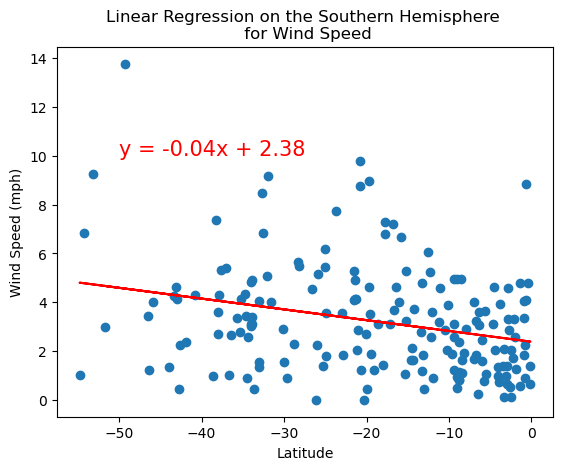

In [23]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = 'Linear Regression on the Southern Hemisphere \n for Wind Speed'
y_label = 'Wind Speed (mph)'
text_coordinates = (-50, 10)

plot_linear_regression(x_values, y_values, "Latitude", y_label, title, text_coordinates)

**Discussion about the linear relationship:** For both the Northern and Southern Hemispheres, the linear regression shows a weak positive relationship between wind speed and latitude. However, the r-squared values are very low, indicating that the linear model does not fit the data very well. It is likely that other factors besides latitude are more influential in determining wind speed.